<a href="https://colab.research.google.com/github/vuke123/Data-processing/blob/main/Hidrology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Obrada informacija**: Prva laboratorijska vježba

Rijeke imaju veliki gospodarski značaj, od termoelektrana i nuklearnih elektrana kojima su rijeke nužne za rad, javne vodoopskrbe do poljoprivrede i transporta. Premda ljudi danas uvelike upravljaju vodotocima, uslijed vremenskih prilika ipak može doći do poplava, erozija tla i sličnih prirodnih nepogoda. Kako bismo se mogli na vrijeme pripremiti za potencijalne probleme, potrebno je istražiti ponašanje rijeka na temelju višegodišnjih praćenja vodostaja. U ovoj laboratorijskoj vježbi ćete analizirati vodostaje rijeke Save kroz period od 25 godina.

Unutar komprimiranog direktorija u kojem se nalazi ova bilježnica, nalazi se i .mat datoteka s podacima o vodostaju rijeke Save u periodu od 1.1.1982. do 31.12.2007. Svaki podatak označava jedan dan mjerenja vodostaja. 

Vježba se izvodi u Pythonu/Google Colabu, a sve naredbe potrebne za provedbu vježbe te njihova objašnjenja dana su u predavanju. Ova laboratorijska vježba nosi 3 boda. 

Kad ste gotovi s vježbom, na *Moodle* postavite .pdf izvješće s vježbe (.pdf izvješće možete generirati s naredbom File-Print-Location: PDF). 

**1.**	Učitajte biblioteke: NumPy, matplotlib.pyplot, scipy.fft, signal iz scipy te pywt.

In [ ]:
import numpy, scipy.fft, matplotlib.pyplot as plt, pywt

In [ ]:
from scipy import signal, io

**2.**	Učitajte podatke o vodostaju iz .mat datoteke koja se nalazi unutar istog komprimiranog direktorija. Učitani podaci su spremljeni u rječnik. Izdvojite ključ i pripadne podatke o vodostajima te po potrebi smanjite dimenziju.

Savjet: .mat datoteku učitajte sa svog Google Drivea (unutar mape Colab Notebooks na svom Google Driveu postavite .mat datoteku). Ostali savjeti nalaze se u sljedećem programskom odsječku. 

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

from google.colab import drive
drive.mount('/content/drive')

# Nakon što pokrenete ovaj odsječak koda, pojavit će se link u prozoru ispod. Kliknite na link, prijavite se sa svojim Google računom te ćete 
# dobiti kod koji trebate kopirati u izlaz ispod ovog prozora (u prozor "Enter your authorization code: "). Nakon što upišete dobiveni kod, 
# pojavit će se poruka "Mounted at /content/drive". 
# Ako unutar takvog Colab Notebook direktorija imate spremljenu datoteku "OIkobas.mat", možete joj pristupiti sljedećim liniijama koda:
#from scipy import io
kobas_iz_matlaba=io.loadmat("drive/My Drive/Colab Notebooks/OIkobas.mat")
print(kobas_iz_matlaba)

Mounted at /content/drive
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Oct 10 13:46:29 2020', '__version__': '1.0', '__globals__': [], 'kobas': array([[661],
       [674],
       [685],
       ...,
       [242],
       [230],
       [228]], dtype=uint16)}


**3.**	Ispišite: broj dana za koje postoje podaci o vodostajima, srednju vrijednost vodostaja, standardnu devijaciju, minimalnu vrijednost, maksimalnu vrijednost te median.

In [ ]:
print(kobas_iz_matlaba['kobas'].size)
print(numpy.mean(kobas_iz_matlaba['kobas']))
print(numpy.std(kobas_iz_matlaba['kobas']))
print(numpy.min(kobas_iz_matlaba['kobas']))
print(numpy.max(kobas_iz_matlaba['kobas']))
print(numpy.median(kobas_iz_matlaba['kobas']))

x = kobas_iz_matlaba['kobas'].flatten()
type(x)

9496
294.25758213984835
183.09167165945507
17
878
255.0


numpy.ndarray

**4.** Nacrtajte vodostaj. Obilježite x i y os te naslov slike. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

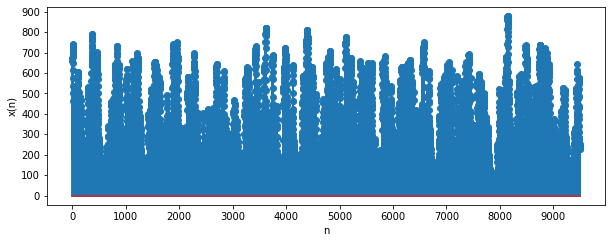

In [ ]:
plt.figure(1, figsize = (10,8))
plt.subplot(2,1,1)
plt.stem(x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.xticks(numpy.arange(0,10000,step=1000))
plt.yticks(numpy.arange(0,1000, step=100))

plt.show

**5.**	Izračunajte diskretnu Fourierovu transformaciju zadanog vodostaja. Ispišite dobivene vrijednosti. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata.

[2794270.        -1.15733201e-10j   -9312.52756202+4.97843399e+04j
   80617.82235263-7.59055383e+04j ...  -75144.8689581 -1.84067812e+04j
   80617.82235263+7.59055383e+04j   -9312.52756202-4.97843399e+04j]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


([<matplotlib.axis.XTick at 0x7f1b0cb46b50>,
 <a list of 10 Text major ticklabel objects>)

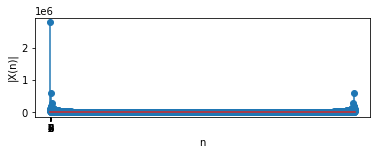

In [ ]:
from numpy.fft import *
type(x)
X=fft(x, 9496)
print(X)

plt.figure(1)
plt.subplot(2, 1, 1)
plt.stem(abs(X))
plt.xlabel('n')
plt.ylabel('|X(n)|')
plt.xticks(numpy.arange(0,10,step=1))


**6.**	Izračunajte Fourierovu transformaciju na vremenskom otvoru zadanog 

1.   List item
2.   List item

vodostaja koristeći pravokutni otvor širine 2 godine. Prikažite rezultat pomoću pcolormesh. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

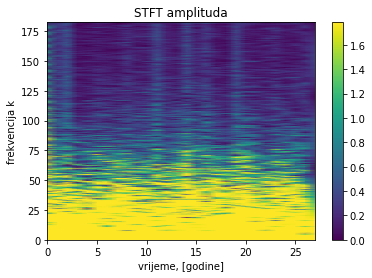

In [ ]:
T = 365
fs = 365
window = 'boxcar'
f, t, Zxx = signal.stft(x, fs, window, nperseg=2*T)
plt.pcolormesh(t, f, numpy.abs(Zxx), vmin=0, vmax=numpy.abs(Zxx.max())/200, shading='gouraud')
plt.colorbar()
plt.title('STFT amplituda')
plt.ylabel('frekvencija k')
plt.xlabel('vrijeme, [godine]')
plt.show()


ODGOVOR: Frekvencije koje su vidljive u vodostaju ovise o postavljanju vmin i vmaxa koji određuje raspon boja
Kada postavimo optimalan vmax frekvencija ide i do 75 mjestimično 
Godine koje iskaču su 2, 11, 14, 16, 19 (odokativna procjena)

**7.**	Upotrijebite drugu širinu otvora (po izboru) i ponovite prethodni zadatak. Ispišite koju širinu ste upotrijebili. Objasnite razlike u dobivenim slikama.

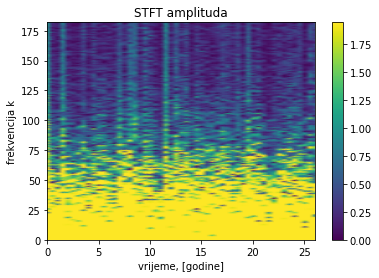

In [ ]:
f, t, Zxx = signal.stft(x, fs, window, nperseg=T) #širina je jedna godina
plt.pcolormesh(t, f, numpy.abs(Zxx), vmin=0, vmax=numpy.abs(Zxx.max())/200, shading='gouraud')
plt.colorbar()
plt.title('STFT amplituda')
plt.ylabel('frekvencija k')
plt.xlabel('vrijeme, [godine]')
plt.show()


ODGOVOR: Slika je puno mutnija zbog manje informacija te je isticanje godina koje imaju izraženiju frekvenciju puno češće

**8.**	Ispišite sve obitelji kontinuiranih valića koje se nalaze u PyWavelets biblioteci. Na istoj slici, koristeći subplot naredbu, nacrtajte dvije valićne funkcije po izboru. U naslovu svake slike napišite o kojim valićima se radi.

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  """
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


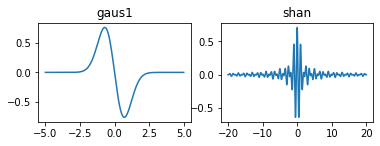

In [ ]:
print(pywt.wavelist(kind='continuous'))
valic1 =  'gaus1'
valic2 = 'shan'
w1 = pywt.ContinuousWavelet(valic1)
w2 = pywt.ContinuousWavelet(valic2)
psi1, t1 = w1.wavefun(level=15)
psi2, t2 = w2.wavefun(level=15)


plt.figure(1)
plt.subplot(2,2,1)
plt.plot(t1,psi1)
plt.title(valic1)

plt.subplot(2,2,2)
plt.plot(t2,psi2)
plt.title(valic2)

plt.show()

**9.**	Koristeći Morlet valić, odredite kontinuiranu valićnu transformaciju zadanog vodostaja. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


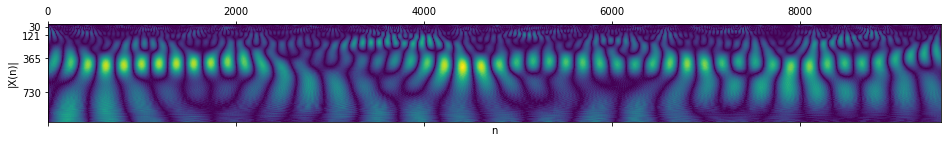

In [ ]:
print(pywt.wavelist(kind='continuous'))
valic =  'morl'
w1 = pywt.ContinuousWavelet(valic)

step=0.7
skala = numpy.arange(0.1,2*T,step)
coef, freqs = pywt.cwt(x, skala, valic)


plt.matshow(abs(coef))
plt.xlabel('n')
plt.ylabel('|X(n)|')
plt.yticks([T//12,T//3,T,2*T])

plt.show()




ODGOVOR: *Ovo je mjesto za odgovor na pitanja iz 9. zadatka.*

**10.**	Odgovorite: objasnite razliku u dobivenim rezultatima STFT i CWT.

ODGOVOR: I STFT i CWT transformacija pretvaraju signal u zapis u frekvencijskoj domeni te pritom ne gube informaciju o vremenu.Kod valićne transformacije(CWT) za razliku od STFT, mijenjamo širinu filtra i tako dobivamo bolje informacije u vremensko-frekvencijskoj analizi. Prvo manjim prozorom dobivamo podatke o nižim frekvencijama te kada ih oduzmemo od sveukupnog signala, većim prozorom dobivamo podatke o višim frekvencijama. Na taj način se frekvencije ne miješaju te nam se stvara puno kvalitetnija i kompleksnija slika. 